Student: Daniela A.Gonzalez

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [154]:
# Parsing the file based on the symbols at the beginning of each line
data = []  # List to store the dictionaries containing publication information

# Initialization of the dictionary to store each publication's information
current_pub = {"title": '', "authors": '', "year": '', "venue": '', "index": '', "refs": [], "abstract": ''}

# Reading the file line by line
with open('acm.txt', 'r') as file:
    lines = file.readlines()

for line in lines:
    line = line.strip()  # Remove unnecessary spaces or newline characters
    
    if line[0:2] == "#*":  # Title
        title = line[2:].strip()
        current_pub["title"] = title if title else "Unknown Title"  # Handle empty titles
        
    elif line[0:2] == "#@":  # Authors
        authors_raw = line[2:].strip()
        # Split authors and clean up possible suffixes like 'Jr.', 'II', etc.
        current_pub["authors"] = [
            author.strip() for author in authors_raw.split(",") if author.strip()
        ]
        
    elif line[0:2] == "#t":  # Year
        year = line[2:].strip()
        current_pub["year"] = int(year) if year.isdigit() else ''  # Handle invalid years
        
    elif line[0:2] == "#c":  # Venue
        current_pub["venue"] = line[2:].strip()
        
    elif line[0:6] == "#index":  # Index
        index = line[6:].strip()
        current_pub["index"] = index if index.isdigit() else ''  # Ensure valid index
        
    elif line[0:2] == "#%":  # References
        ref = line[2:].strip()
        if ref.isdigit():  # Check if reference is valid
            current_pub["refs"].append(ref)
            
    elif line[0:2] == "#!":  # Abstract
        current_pub["abstract"] = line[2:].strip()
        
    elif line == "":  # End of publication
        if current_pub["index"]:  # Ensure the publication has a valid index
            data.append(current_pub)  # Add the publication to the list
            # Reinitialize the dictionary for the next publication
            current_pub = {"title": '', "authors": '', "year": '', "venue": '', "index": '', "refs": [], "abstract": ''}

# Convert the list of dictionaries into a DataFrame for further analysis
import pandas as pd
df = pd.DataFrame(data)


print(df.head())





                                               title  \
0  MOSFET table look-up models for circuit simula...   
1  The verification of the protection mechanisms ...   
2  Another view of functional and multivalued dep...   
3     Entity-relationship diagrams which are in BCNF   
4                          The computer comes of age   

                                             authors  year  \
0                                                     1984   
1                                 [Virgil D. Gligor]  1984   
2                         [M. Gyssens, J. Paredaens]  1984   
3  [Sushil Jajodia, Peter A. Ng, Frederick N. Spr...  1984   
4                                      [Rene Moreau]  1984   

                                           venue index refs abstract  
0                  Integration, the VLSI Journal     1   []           
1  International Journal of Parallel Programming     2   []           
2  International Journal of Parallel Programming     3   []           
3  Int

# a) Number of publications, different authors , venues and references
For this I just got the len() for each serie in the DF.

In [155]:
# Number of publications
num_publications = len(df["title"])  # Total number of rows in the 'title' column

# Number of distinct authors
distinct_authors = set()  # Using a set to handle potential duplicates
df["authors"].dropna().apply(lambda x: distinct_authors.update(x))
num_distinct_authors = len(distinct_authors)

# Number of distinct venues
num_distinct_venues = df["venue"].nunique()  # Count unique venues

# Total number of references
num_references = df["refs"].apply(len).sum()  # Sum the lengths of all reference lists

# Results
print(f"Number of publications: {num_publications}") 
print(f"Number of distinct authors: {num_distinct_authors}")
print(f"Number of distinct venues: {num_distinct_venues}")
print(f"Total number of references: {num_references}")




Number of publications: 2385066
Number of distinct authors: 1651588
Number of distinct venues: 273330
Total number of references: 9671893


# B. Are these numbers likely to be accurate? As an example look up all the publications venue names"
# associated with the conference “Principles and Practice of Knowledge Discovery in Databases” – what do
# you notice?""


In [156]:
import re
# Target  journal full name
venue_search = "Principles and Practice of Knowledge Discovery in Databases"

# Break the original title into smaller phrases
keywords_search = [
    venue_search.lower(), 
    "principles and practices of knowledge discovery", 
    "ppkdd", 
    "pkdd"
]

# Homogeneization of  the 'venue' column
df["venue_clean"] = df["venue"].fillna('').str.lower().str.strip()

# Exact matches: check for the full target title
exact_matches = df[df["venue_clean"] == venue_search.lower()]

# Partial matches: check if any keyword (including the full target title) is in the venue name
partial_matches = df[df["venue_clean"].apply(
    lambda x: any(keyword in x for keyword in keywords_search)
)]

print(f"Exact matches for '{venue_search}': {len(exact_matches)}")
print(f"Partial matches using keywords: {len(partial_matches)}")

# examples of partial matches
print("\nExamples of venue names from partial matches:")
print(partial_matches["venue"].unique())



Exact matches for 'Principles and Practice of Knowledge Discovery in Databases': 0
Partial matches using keywords: 1406

Examples of venue names from partial matches:
["PKDD '97 Proceedings of the First European Symposium on Principles of Data Mining and Knowledge Discovery"
 "PKDD '98 Proceedings of the Second European Symposium on Principles of Data Mining and Knowledge Discovery"
 "PKDD '99 Proceedings of the Third European Conference on Principles of Data Mining and Knowledge Discovery"
 "PKDD '00 Proceedings of the 4th European Conference on Principles of Data Mining and Knowledge Discovery"
 "PKDD '01 Proceedings of the 5th European Conference on Principles of Data Mining and Knowledge Discovery"
 "PKDD '02 Proceedings of the 6th European Conference on Principles of Data Mining and Knowledge Discovery"
 "PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases"
 'Knowledge Discovery in Databases: PKDD 2006: 10th European C

# c. Publications per authors 

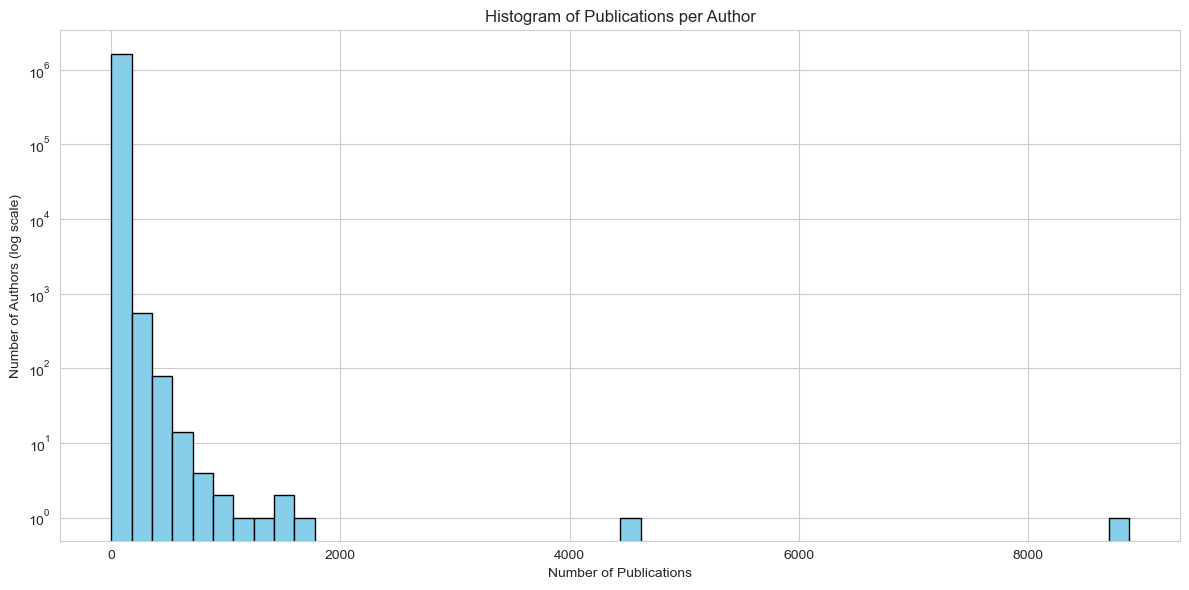

In [157]:
# Creation of Dic to store the number of publications per author
publications_per_author = {}

# Iterate over the DataFrame to count publications for each author
for _, row in df.iterrows():
    authors_list = row["authors"]  # List of authors for the current publication
    
    if authors_list:  # Ensure authors_list is not None or empty
        for author in authors_list:
            if author not in publications_per_author:
                publications_per_author[author] = 0
            publications_per_author[author] += 1  # Increment the publication count for the author

# Extract the number of publications as a list
num_publications = list(publications_per_author.values())

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(num_publications, bins=50, color='skyblue', edgecolor='black', log=True)
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.xlabel('Number of Publications')
plt.ylabel('Number of Authors (log scale)')
plt.title('Histogram of Publications per Author')
plt.tight_layout()
plt.show()



# d. Mean of publications per author. STD, Q1, Q2, Q3. 

In [158]:
# acceding the previous dictionary created to its values to create the list of numbers of publications
num_publications_per_author = list(publications_per_author.values())

# stats
mean = np.mean(num_publications_per_author)
std_dev = np.std(num_publications_per_author)
q1 = np.percentile(num_publications_per_author, 25)
q2 = np.percentile(num_publications_per_author, 50)  # Median
q3 = np.percentile(num_publications_per_author, 75)


print(f"Mean number of publications per author: {mean:.2f}")
print(f"Standard deviation: {std_dev:.2f}")
print(f"Q1 (1st quartile): {q1}")
print(f"Q2 (Median): {q2}")
print(f"Q3 (3rd quartile): {q3}")


if mean > q2:
    print("\nThe mean is greater than the median, indicating a right-skewed distribution.")
else:
    print("\nThe mean is less than or equal to the median, indicating a more symmetric distribution.")
print(f"The interquartile range (Q3 - Q1) is {q3 - q1}, showing the spread of the middle 50% of the data.")


Mean number of publications per author: 3.46
Standard deviation: 12.77
Q1 (1st quartile): 1.0
Q2 (Median): 1.0
Q3 (3rd quartile): 3.0

The mean is greater than the median, indicating a right-skewed distribution.
The interquartile range (Q3 - Q1) is 2.0, showing the spread of the middle 50% of the data.


In [159]:
#Rechecking the stats manually
total_pubs = sum(publications_per_author.values())
total_authors = len(publications_per_author)
calculated_mean = total_pubs / total_authors
print(f"Total publications: {total_pubs}, Total authors: {total_authors}, Calculated mean: {calculated_mean}")


Total publications: 5718610, Total authors: 1651588, Calculated mean: 3.4624918563225213


# e. Publications per venue , stats, histogram, venue with the maximun value.

In [115]:
# acceding to the serie venue in the df
publications_per_venue = df["venue"].value_counts()

# stats
mean = np.mean(publications_per_venue)
std_dev = np.std(publications_per_venue)
q1 = np.percentile(publications_per_venue, 25)
q2 = np.percentile(publications_per_venue, 50)  # Median
q3 = np.percentile(publications_per_venue, 75)

# Venue with the max value of publications
max_venue = publications_per_venue.idxmax() #retrieving the journal name with the maximun value
max_venue_count = publications_per_venue.max() #return the value itself

# results
print(f"Mean number of publications per venue: {mean:.2f}")
print(f"Standard deviation: {std_dev:.2f}")
print(f"Q1 (1st quartile): {q1}")
print(f"Q2 (Median): {q2}")
print(f"Q3 (3rd quartile): {q3}")
print(f"The venue with the largest number of publications is '{max_venue}' with {max_venue_count} publications.")


Mean number of publications per venue: 8.73
Standard deviation: 106.80
Q1 (1st quartile): 1.0
Q2 (Median): 1.0
Q3 (3rd quartile): 1.0
The venue with the largest number of publications is 'IEEE Transactions on Information Theory' with 12754 publications.


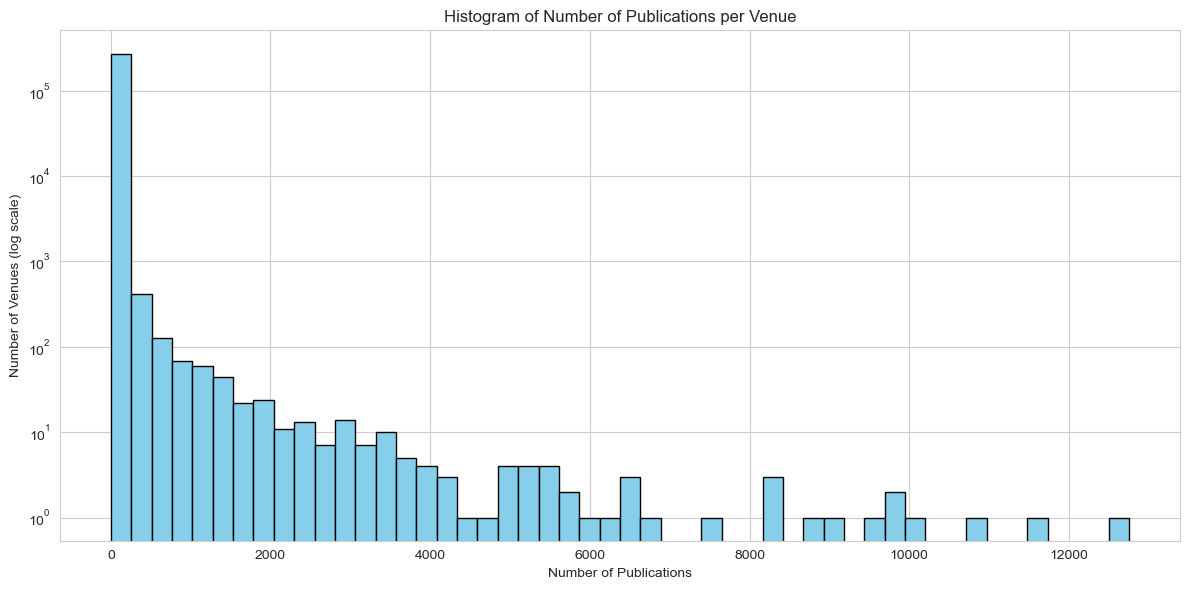

In [116]:
# histogram 
plt.figure(figsize=(12, 6))
plt.hist(publications_per_venue, bins=50, color='skyblue', edgecolor='black', log=True)
plt.xlabel('Number of Publications')
plt.ylabel('Number of Venues (log scale)')
plt.title('Histogram of Number of Publications per Venue')
plt.tight_layout()
plt.show()




# F) Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations?


In [120]:
# Article (index and title) with the highest number of citations (%REF occurrences)
# Create a dictionary to count occurrences of each index in the %REF field
citations_count = {}

for _, row in df.iterrows():
    if row["refs"]:  # Ensure 'refs' is not empty
        for ref in row["refs"]:  # Iterate over each reference
            if ref not in citations_count:
                citations_count[ref] = 0
            citations_count[ref] += 1

df["citations"] = df["index"].apply(lambda x: citations_count.get(x, 0))


# Find the index with the highest number of citations
most_cited_index = max(citations_count, key=citations_count.get)  # Most cited index
most_cited_count = citations_count[most_cited_index]  # Number of citations

# Retrieve the title of the most cited publication
if most_cited_index in df["index"].values:
    most_cited_pub = df[df["index"] == most_cited_index].iloc[0]
    most_cited_title = most_cited_pub["title"]
else:
    most_cited_title = "Title not found"

print(f"Publication with the largest number of citations:")
print(f"Title: {most_cited_title}")
print(f"Index: {most_cited_index}")
print(f"Number of citations: {most_cited_count}")



# Venue with the largest number of cited articles
# Create a dictionary to count how many times articles from each venue appear in %REF
venue_citations = {}

for _, row in df.iterrows():
    venue = row["venue"]
    pub_index = row["index"]
    citations = citations_count.get(pub_index, 0)  # Citations for this publication

    if venue not in venue_citations:
        venue_citations[venue] = 0
    venue_citations[venue] += citations

# Find the venue with the highest number of cited articles
most_cited_venue = max(venue_citations, key=venue_citations.get)
most_cited_venue_count = venue_citations[most_cited_venue]

print(f"\nVenue with the largest number of cited articles:")
print(f"Venue: {most_cited_venue}")
print(f"Total citations: {most_cited_venue_count}")







Publication with the largest number of citations:
Title: INFORMS Journal on Computing
Index: 2135000
Number of citations: 938039

Venue with the largest number of cited articles:
Venue: INFORMS Journal on Computing
Total citations: 942441


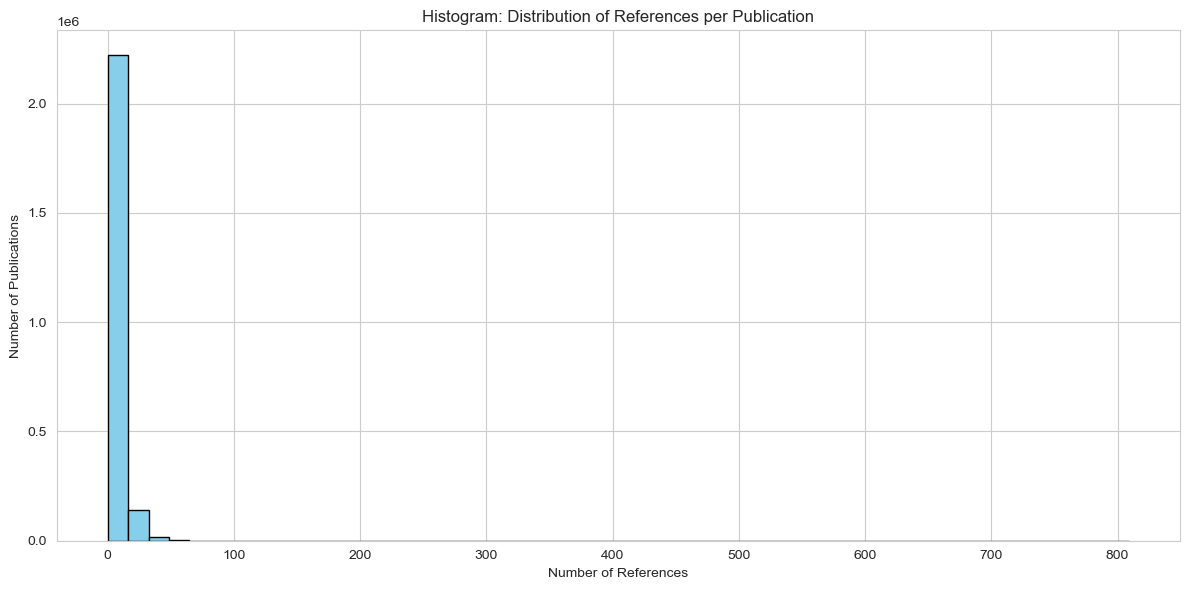

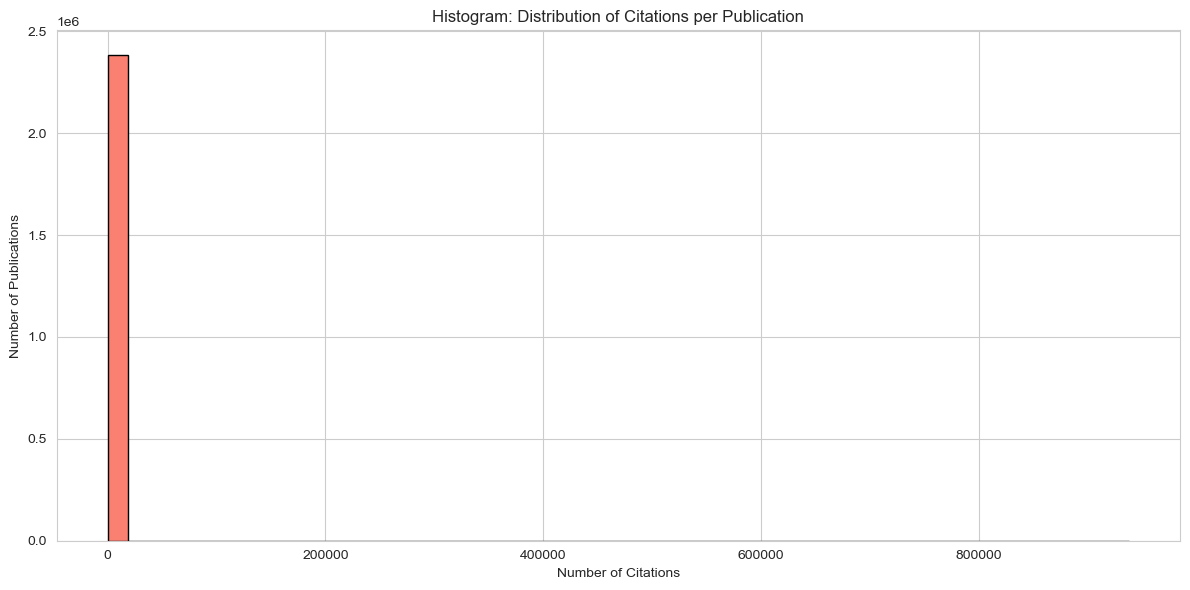

In [121]:
# Plot: Distribution of the number of references per publication
plt.figure(figsize=(12, 6))
plt.hist(num_references, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of References')
plt.ylabel('Number of Publications')
plt.title('Histogram: Distribution of References per Publication')
plt.tight_layout()
plt.show()

# Plot: Distribution of the number of citations per publication
plt.figure(figsize=(12, 6))
plt.hist(df["citations"], bins=50, color='salmon', edgecolor='black')
plt.xlabel('Number of Citations')
plt.ylabel('Number of Publications')
plt.title('Histogram: Distribution of Citations per Publication')
plt.tight_layout()
plt.show()






# G. Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations
# for the publications in the venue, and then divide this number by the number of publications for the venue.
# Plot a histogram of the results

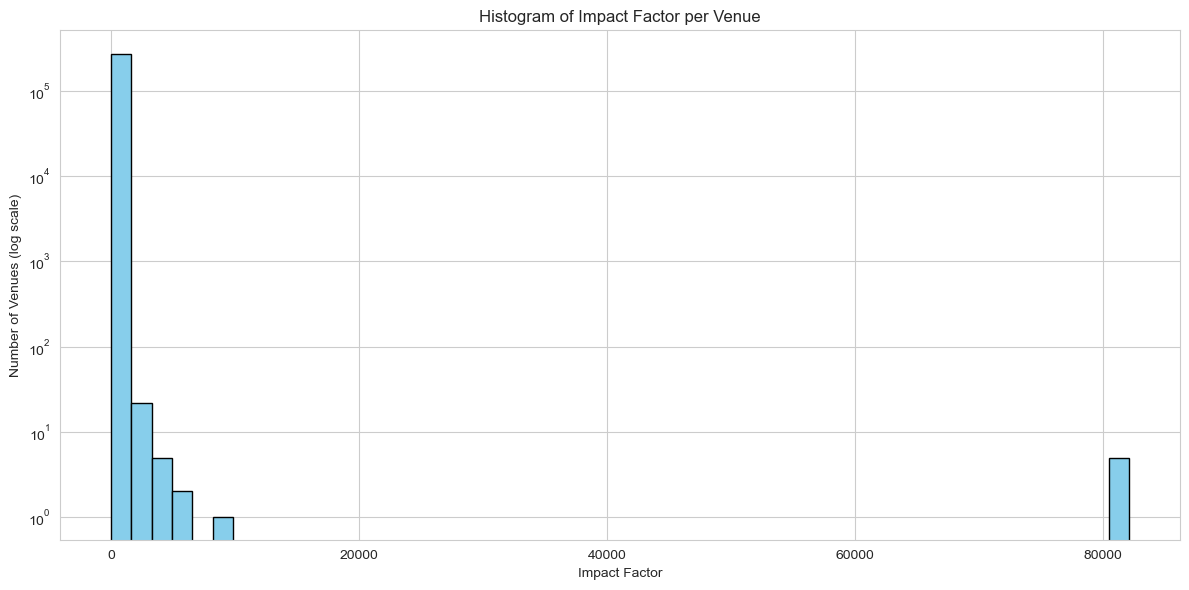

In [123]:
# Calculate the total number of citations for each venue
citations_per_venue = {} #dict initialized

for _, row in df.iterrows():
    venue = row["venue"]
    pub_index = row["index"]

    if venue not in citations_per_venue:
        citations_per_venue[venue] = 0

    # Add the citation count (number of times the index appears in #%REF) to the venue
    citations_per_venue[venue] += citations_count.get(pub_index, 0)

# Calculate the number of publications for each venue
publications_per_venue = df["venue"].value_counts().to_dict()

# Calculate the impact factor for each venue
impact_factor = {}

for venue, total_citations in citations_per_venue.items():
    num_publications = publications_per_venue.get(venue, 0)
    if num_publications > 0:  # Avoid division by zero
        impact_factor[venue] = total_citations / num_publications

# Extract the impact factors and plot a histogram
impact_factors = list(impact_factor.values())

plt.figure(figsize=(12, 6))
plt.hist(impact_factors, bins=50, color='skyblue', edgecolor='black', log=True)
plt.xlabel('Impact Factor')
plt.ylabel('Number of Venues (log scale)')
plt.title('Histogram of Impact Factor per Venue')
plt.tight_layout()
plt.show()



In [124]:
# Find the venue with the highest impact factor
highest_impact_venue = max(impact_factor, key=impact_factor.get)
highest_impact_value = impact_factor[highest_impact_venue]

print(f"The venue with the highest apparent impact factor is: {highest_impact_venue}")
print(f"Highest impact factor value: {highest_impact_value:.2f}")


The venue with the highest apparent impact factor is: Graphics Interface 1990
Highest impact factor value: 82080.00


In [125]:
num_publications_in_highest = publications_per_venue[highest_impact_venue]
print(f"Number of publications in {highest_impact_venue}: {num_publications_in_highest}")


Number of publications in Graphics Interface 1990: 1


In [126]:
citation_counts_in_highest = [
    citations_count.get(pub_index, 0) for pub_index, venue in zip(df["index"], df["venue"]) if venue == highest_impact_venue
]
print(f"Citations for publications in {highest_impact_venue}: {citation_counts_in_highest}")


Citations for publications in Graphics Interface 1990: [82080]


Since the denominator (number of publications) is really small, this value is biased.

# Recompute previous exercise but with Venues with at least 10 publications 

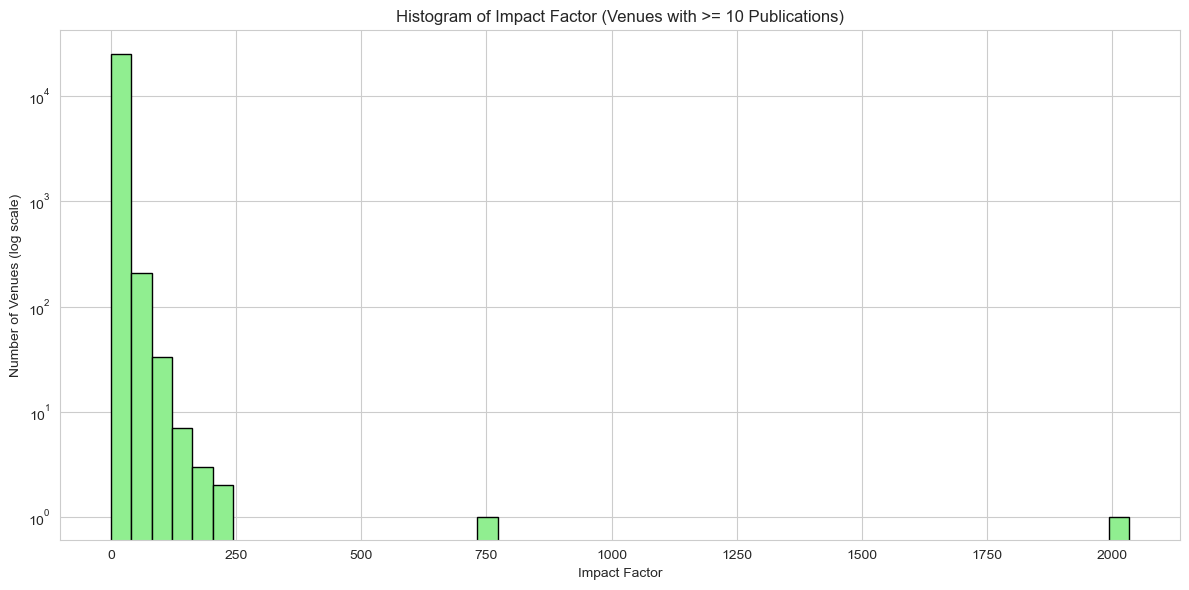

The venue with the highest filtered impact factor is: Proceedings of the 19th ACM SIGKDD international conference on Knowledge discovery and data mining
Highest filtered impact factor value: 2033.20
Citation counts for all publications in this venue: [9, 3, 1, 0, 0, 10, 0, 2, 0, 1, 0, 0, 0, 5, 0, 1, 1, 2, 3, 3, 1, 3, 1, 1, 2, 1, 0, 1, 0, 3, 0, 2, 8, 1, 3, 0, 0, 0, 1, 1, 1, 4, 0, 5, 1, 0, 0, 5, 4, 3, 0, 1, 0, 1, 1, 7, 1, 1, 1, 0, 3, 0, 2, 6, 2, 2, 2, 4, 5, 5, 2, 0, 9, 1, 3, 2, 0, 1, 3, 0, 1, 3, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 6, 0, 3, 1, 1, 15, 1, 1, 2, 3, 4, 2, 4, 3, 0, 4, 0, 3, 2, 2, 1, 4, 10, 2, 0, 0, 2, 4, 0, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 4, 2, 0, 1, 0, 1, 0, 0, 5, 3, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 8, 1, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 1, 0, 3, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 82080, 82080, 82080, 82080, 82080]
Mean number of citations: 2033.20
Median number of citations: 1


In [127]:
# Filter venues with at least 10 publications
filtered_impact_factor = {}

for venue, total_citations in citations_per_venue.items(): #previous dict created
    num_publications = publications_per_venue.get(venue, 0)
    if num_publications >= 10:  # Only consider venues with 10 or more publications
        filtered_impact_factor[venue] = total_citations / num_publications
        
        
        

# Histogram of filtered impact factors
filtered_impact_factors = list(filtered_impact_factor.values())

plt.figure(figsize=(12, 6))
plt.hist(filtered_impact_factors, bins=50, color='lightgreen', edgecolor='black', log=True)
plt.xlabel('Impact Factor')
plt.ylabel('Number of Venues (log scale)')
plt.title('Histogram of Impact Factor (Venues with >= 10 Publications)')
plt.tight_layout()
plt.show()

# Venue with the highest impact factor in the filtered set
highest_filtered_impact_venue = max(filtered_impact_factor, key=filtered_impact_factor.get)
highest_filtered_impact_value = filtered_impact_factor[highest_filtered_impact_venue]

# List the citation counts for all publications in this venue
citation_counts_highest_impact = [
    citations_count.get(pub_index, 0) for pub_index, venue in zip(df["index"], df["venue"]) if venue == highest_filtered_impact_venue
]

# stats
mean_citations = sum(citation_counts_highest_impact) / len(citation_counts_highest_impact)
median_citations = sorted(citation_counts_highest_impact)[len(citation_counts_highest_impact) // 2]


print(f"The venue with the highest filtered impact factor is: {highest_filtered_impact_venue}")
print(f"Highest filtered impact factor value: {highest_filtered_impact_value:.2f}")
print(f"Citation counts for all publications in this venue: {citation_counts_highest_impact}")
print(f"Mean number of citations: {mean_citations:.2f}")
print(f"Median number of citations: {median_citations}")


#Answer: the median is close to the down limit but the mean is pretty high because of the outliers highlithing an skewed distribution of the data.

# construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

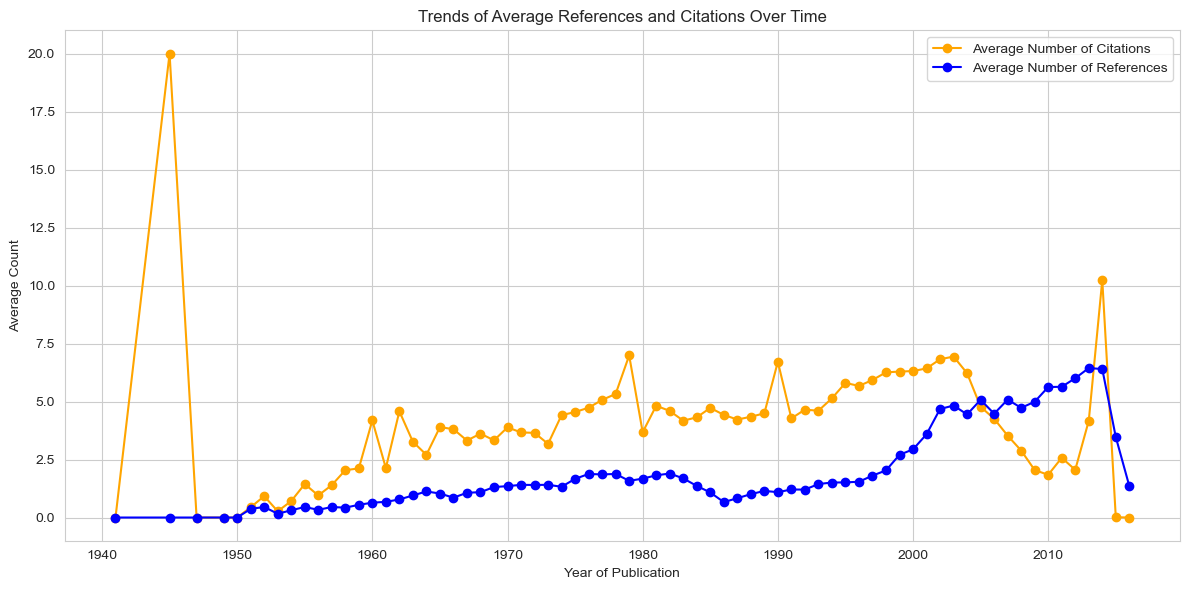

In [133]:

import collections

#checking values in year serie
df["year"] = pd.to_numeric(df["year"], errors="coerce")  
df = df[df["year"].notna()]  
df["year"] = df["year"].astype(int)  
df = df[df["year"] >= 1940] 

# Dictionary to store publications, citations, and references by year
year_publication = {}

for _, row in df.iterrows():
    year = row["year"]
    index = row["index"]
    citations = cite.get(index, 0)
    references = len(row["refs"])

    if year not in year_publication:
        year_publication[year] = {"publications": 0, "citations": 0, "references": 0}
    
    year_publication[year]["publications"] += 1
    year_publication[year]["citations"] += citations
    year_publication[year]["references"] += references

# Calculate averages for each year
average_year = {
    year: {
        "citations": year_data["citations"] / year_data["publications"],
        "references": year_data["references"] / year_data["publications"]
    }
    for year, year_data in year_publication.items()
}

# Sort by year
average_year = collections.OrderedDict(sorted(average_year.items()))

# Extract data for plotting
x = list(average_year.keys())  # Years
y1 = [average_year[year]["citations"] for year in x]  # Average citations
y2 = [average_year[year]["references"] for year in x]  # Average references

# Plot trends
plt.figure(figsize=(12, 6))
plt.plot(x, y1, label="Average Number of Citations", marker="o", color="orange")
plt.plot(x, y2, label="Average Number of References", marker="o", color="blue")
plt.xlabel("Year of Publication")
plt.ylabel("Average Count")
plt.title("Trends of Average References and Citations Over Time")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()




The average number citations has been increasing each year along with the avg number of references.